 Bank Marketing
 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] 

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).    The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df=pd.read_csv("bank-additional-full.csv")
df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


##### This dataset is seperated by ";". So i will have to fix it by using the libraray.
##### And also,In this dataset Nan value is not present but instead of Nan , Unknown value is present. SO, i will have convert Unknown value into Nan value.

In [3]:
df=pd.read_csv("bank-additional-full.csv",sep=";",na_values='unknown')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
pd.set_option("display.max_columns",None)

In [5]:
# to see top 5 dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# to see last 5 dataset
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# Exploratory Data Analysis

### Before training the model, we need to observe and analyse the data.

In [7]:
# size of the dataset
df.shape

(41188, 21)

In [8]:
# checking the type of dataset
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
# columns names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
# information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# Detalied dataset
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [12]:
# Checking for missing values
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

we can easily observed that in 2,3,4,5,6 and 7 have missing values. so I  will have to fill that missing values by using "mode"
method because all the variables are categorical and "mode" method works on categorical data.

In [13]:
# #Imputing missing values in dataset with mode imputation.
from sklearn.impute import SimpleImputer
sim=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [14]:
df.iloc[:,1:7]=sim.fit_transform(df.iloc[:,1:7])

In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes


In [16]:
# Again checking missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
# Checking that whether data is balance or not
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

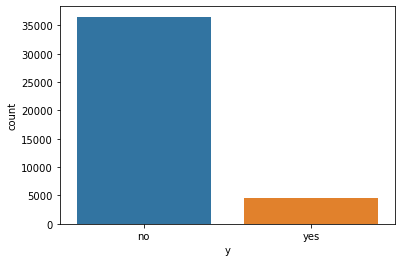

In [18]:
sns.countplot("y",data=df)

We have 36548 people does not subscribe term deposite and 4640 people subscribe term deposite, so our dataset is unbalanced.
so we will have to balanced the data

In [19]:
 colname_cat=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname_cat.append(x)
colname_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

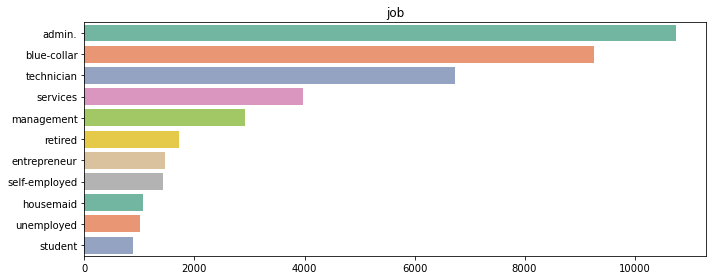

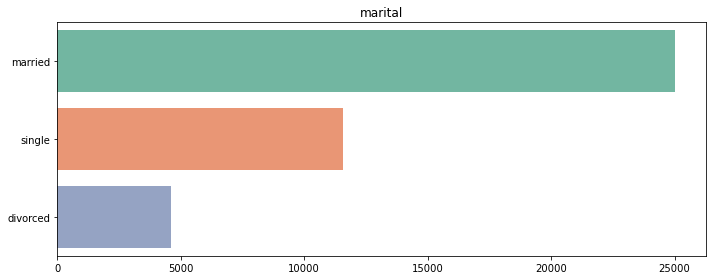

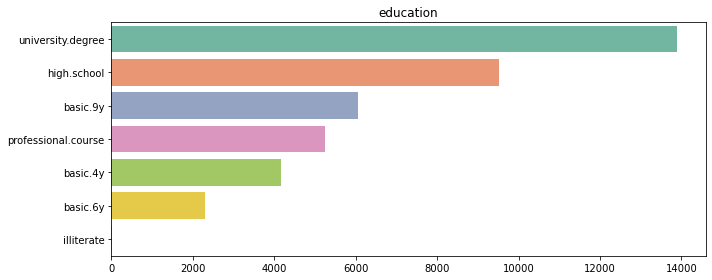

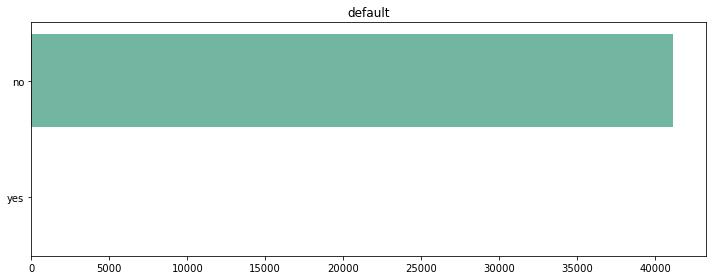

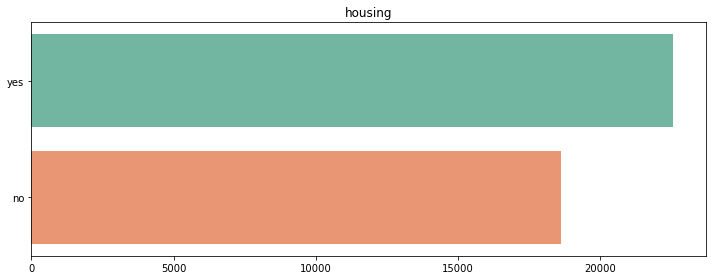

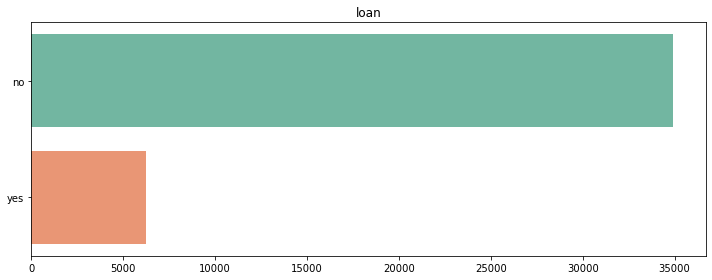

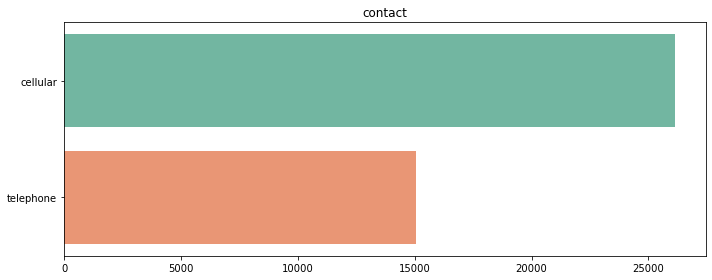

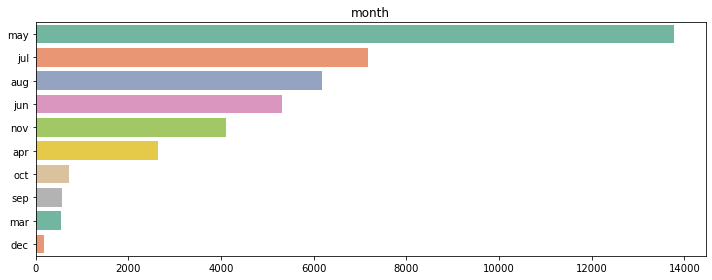

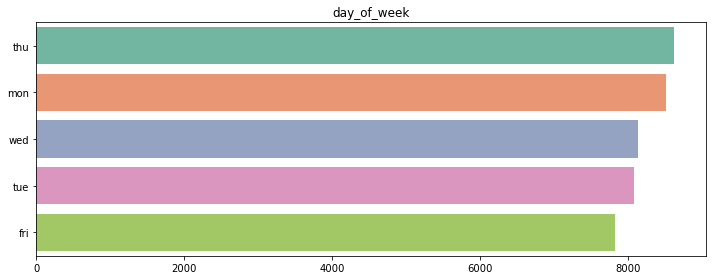

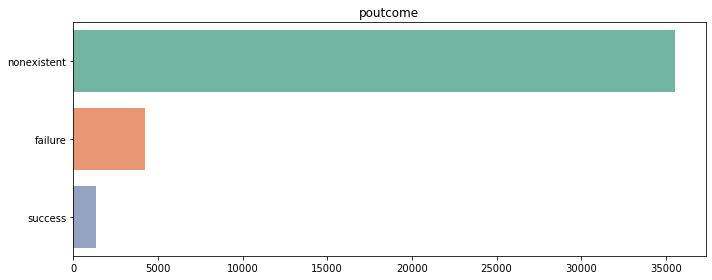

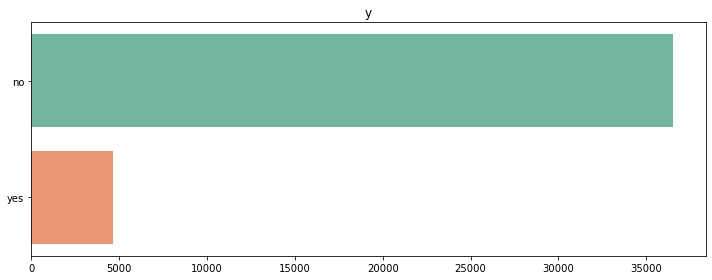

In [20]:
for col in colname_cat:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index, palette='Set2')
    plt.title(col)
    plt.tight_layout()


## Correlation Matrix

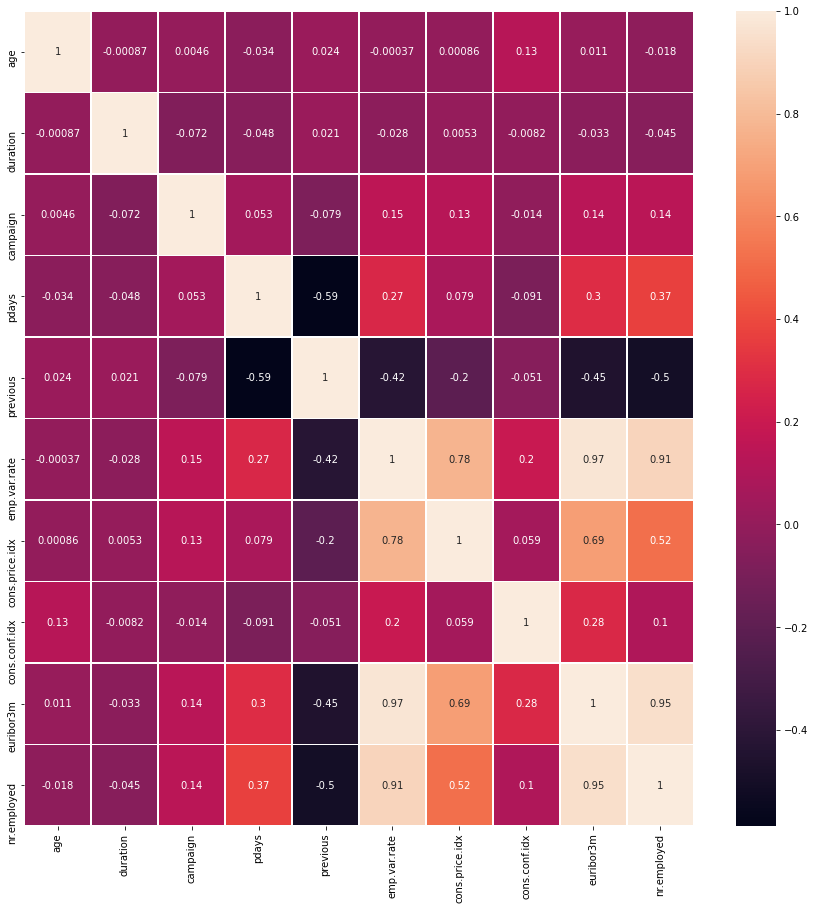

In [21]:
#  correlation matrix of dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5)

# Data Preprocessing

In [30]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [33]:
df.iloc[:,-1]=lab.fit_transform(df.iloc[:,-1])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,261.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,7.00,1.00,3.00,0.00,0.00,0.00,1.00,6.00,1.00,149.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,7.00,1.00,3.00,0.00,1.00,0.00,1.00,6.00,1.00,226.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,151.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,7.00,1.00,3.00,0.00,0.00,1.00,1.00,6.00,1.00,307.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.00,1.00,5.00,0.00,1.00,0.00,0.00,7.00,0.00,334.00,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,1
41184,46,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,383.00,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,0
41185,56,5.00,1.00,6.00,0.00,1.00,0.00,0.00,7.00,0.00,189.00,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,0
41186,44,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,442.00,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,1


In [34]:
df.iloc[:,14]=lab.fit_transform(df.iloc[:,14])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,261.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
1,57,7.00,1.00,3.00,0.00,0.00,0.00,1.00,6.00,1.00,149.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
2,37,7.00,1.00,3.00,0.00,1.00,0.00,1.00,6.00,1.00,226.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
3,40,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,151.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
4,56,7.00,1.00,3.00,0.00,0.00,1.00,1.00,6.00,1.00,307.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.00,1.00,5.00,0.00,1.00,0.00,0.00,7.00,0.00,334.00,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,1
41184,46,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,383.00,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,0
41185,56,5.00,1.00,6.00,0.00,1.00,0.00,0.00,7.00,0.00,189.00,2,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,0
41186,44,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,442.00,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,1


In [25]:
from sklearn.preprocessing import OrdinalEncoder
orencoder=OrdinalEncoder()

In [29]:
df.iloc[:,1:10]=orencoder.fit_transform(df.iloc[:,1:10])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,261.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,7.00,1.00,3.00,0.00,0.00,0.00,1.00,6.00,1.00,149.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,7.00,1.00,3.00,0.00,1.00,0.00,1.00,6.00,1.00,226.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,151.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,7.00,1.00,3.00,0.00,0.00,1.00,1.00,6.00,1.00,307.00,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.00,1.00,5.00,0.00,1.00,0.00,0.00,7.00,0.00,334.00,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,1
41184,46,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,383.00,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,0
41185,56,5.00,1.00,6.00,0.00,1.00,0.00,0.00,7.00,0.00,189.00,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,0
41186,44,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,442.00,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,1


In [35]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,261.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
1,57,7.00,1.00,3.00,0.00,0.00,0.00,1.00,6.00,1.00,149.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
2,37,7.00,1.00,3.00,0.00,1.00,0.00,1.00,6.00,1.00,226.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
3,40,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,151.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
4,56,7.00,1.00,3.00,0.00,0.00,1.00,1.00,6.00,1.00,307.00,1,999,0,1,1.10,93.99,-36.40,4.86,5191.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5.00,1.00,5.00,0.00,1.00,0.00,0.00,7.00,0.00,334.00,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,1
41184,46,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,383.00,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,0
41185,56,5.00,1.00,6.00,0.00,1.00,0.00,0.00,7.00,0.00,189.00,2,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,0
41186,44,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,442.00,1,999,0,1,-1.10,94.77,-50.80,1.03,4963.60,1


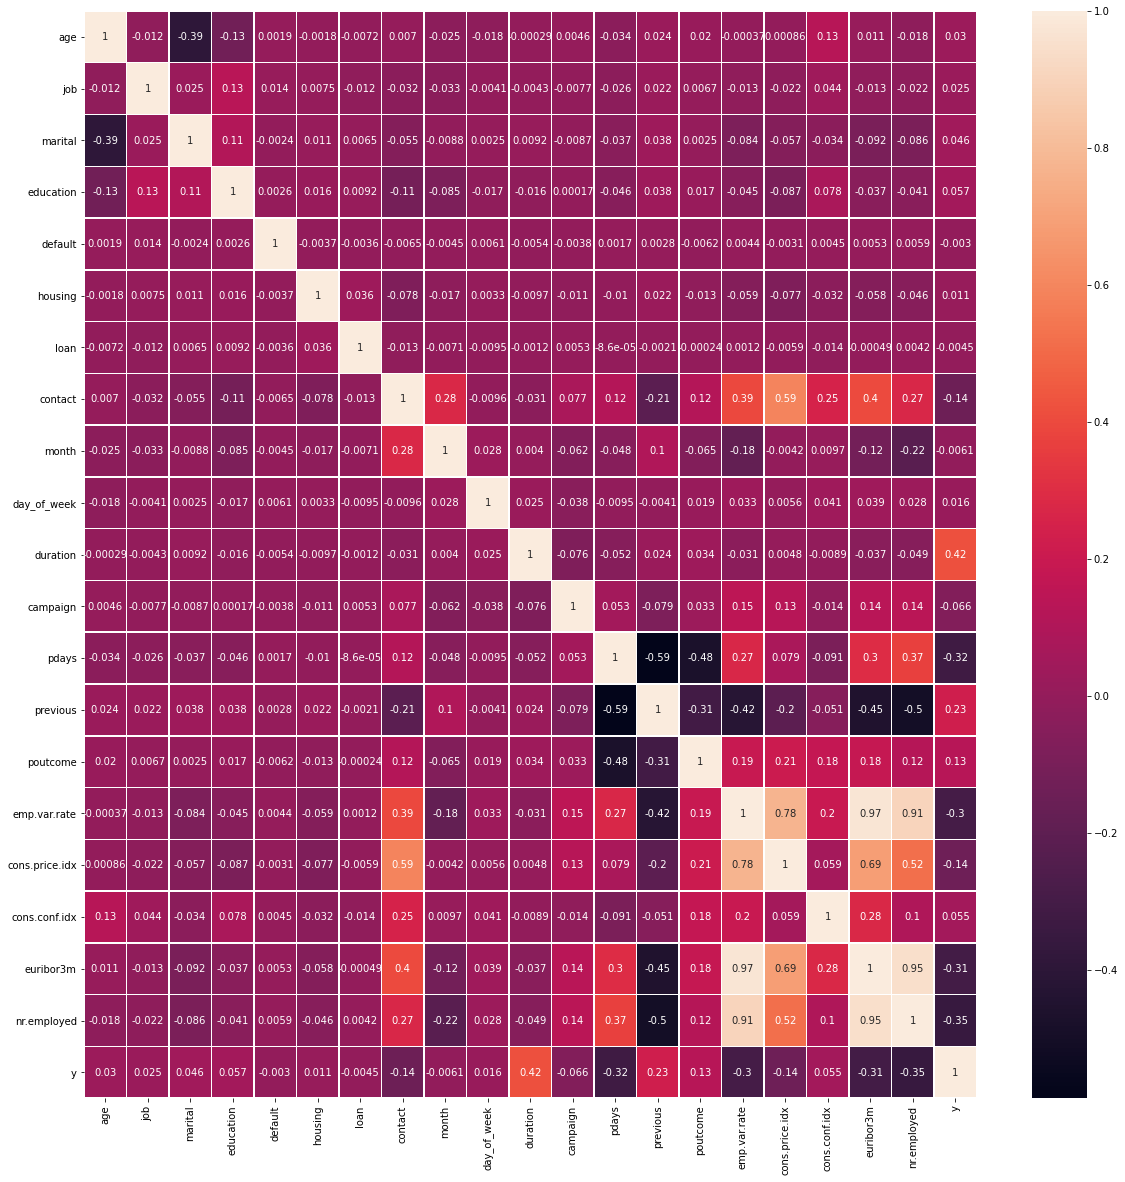

In [37]:
#  correlation matrix of dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5)

<AxesSubplot:title={'center':'Correlation with target'}>

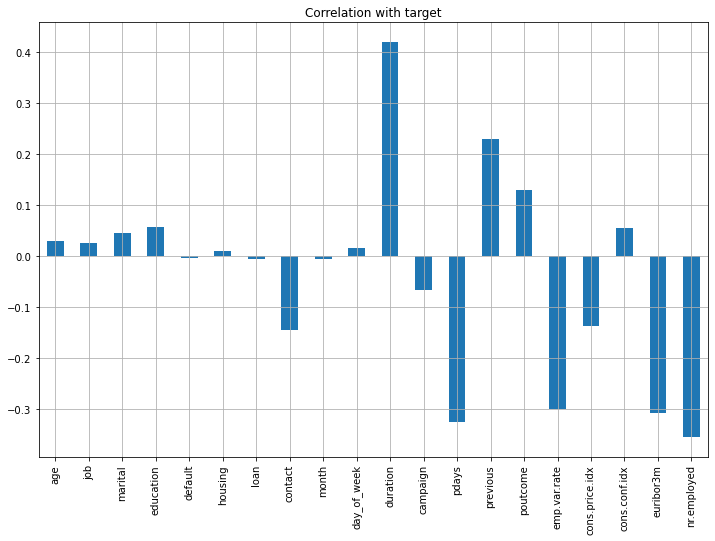

In [38]:
df.drop('y', axis=1).corrwith(df.y).plot(kind='bar', figsize=(12, 8), grid=True,
                                                   title="Correlation with target")

Observations from correlation:

1. default, housing, loan, month and day_of_week are the least correlated with the y variable.

2. All other variables have a significant correlation with the target variable.

### Feature Scaling

The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias.

So, to deal with this potential problem, we need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

In [41]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
feature_scale = ['age', 'duration', 'pdays', 'cons.price.idx', 'cons.conf.idx','nr.employed']
df[feature_scale] = standScaler.fit_transform(df[feature_scale])

In [42]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.53,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,0.02,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33,0
1,1.63,7.00,1.00,3.00,0.00,0.00,0.00,1.00,6.00,1.00,-0.44,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33,0
2,-0.29,7.00,1.00,3.00,0.00,1.00,0.00,1.00,6.00,1.00,-0.12,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33,0
3,-0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,-0.44,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33,0
4,1.53,7.00,1.00,3.00,0.00,0.00,1.00,1.00,6.00,1.00,0.22,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.16,5.00,1.00,5.00,0.00,1.00,0.00,0.00,7.00,0.00,0.33,1,0.20,0,1,-1.10,2.06,-2.22,1.03,-2.82,1
41184,0.57,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,0.54,1,0.20,0,1,-1.10,2.06,-2.22,1.03,-2.82,0
41185,1.53,5.00,1.00,6.00,0.00,1.00,0.00,0.00,7.00,0.00,-0.28,2,0.20,0,1,-1.10,2.06,-2.22,1.03,-2.82,0
41186,0.38,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,0.78,1,0.20,0,1,-1.10,2.06,-2.22,1.03,-2.82,1


In [43]:
# spillting the dataset into features(independend variables) and target(dependent variables)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [44]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.53,3.00,1.00,0.00,0.00,0.00,0.00,1.00,6.00,1.00,0.02,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33
1,1.63,7.00,1.00,3.00,0.00,0.00,0.00,1.00,6.00,1.00,-0.44,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33
2,-0.29,7.00,1.00,3.00,0.00,1.00,0.00,1.00,6.00,1.00,-0.12,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33
3,-0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,6.00,1.00,-0.44,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33
4,1.53,7.00,1.00,3.00,0.00,0.00,1.00,1.00,6.00,1.00,0.22,1,0.20,0,1,1.10,0.72,0.89,4.86,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.16,5.00,1.00,5.00,0.00,1.00,0.00,0.00,7.00,0.00,0.33,1,0.20,0,1,-1.10,2.06,-2.22,1.03,-2.82
41184,0.57,1.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,0.54,1,0.20,0,1,-1.10,2.06,-2.22,1.03,-2.82
41185,1.53,5.00,1.00,6.00,0.00,1.00,0.00,0.00,7.00,0.00,-0.28,2,0.20,0,1,-1.10,2.06,-2.22,1.03,-2.82
41186,0.38,9.00,1.00,5.00,0.00,0.00,0.00,0.00,7.00,0.00,0.78,1,0.20,0,1,-1.10,2.06,-2.22,1.03,-2.82


In [45]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

# Model Building

I will be experimenting with 3 algorithim:

1. Logistic Regression
2. Naive Bayes
2. Decision Tree Classifier
3. Random Forest Classifier

In [47]:
# spliting the dataset into features(independend variables) and target(dependent variables)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [50]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear') #It is the default solver for Scikit-learn versions earlier than 0.22.0.
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [51]:
# Predicting the Test set results
yp_pred = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
print()
print("-------Confusion Matrix----")
confusion_matrix(y_test,yp_pred)


-------Confusion Matrix----


array([[8860,  256],
       [ 682,  499]], dtype=int64)

In [53]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Logistic regression: ',accuracy_score(y_test,yp_pred)*100)

Accuracy in case of  Logistic regression:  90.89055064581916


## 2. Naive Bayes

In [54]:
# Fitting Naive bayes to the Training set
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [55]:
# Predicting the Test set results
yp_pred = model.predict(X_test)

In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("-------Confusion Matrix----")
confusion_matrix(y_test,yp_pred)

-------Confusion Matrix----


array([[6513, 2603],
       [ 211,  970]], dtype=int64)

In [57]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Naive bayes: ',accuracy_score(y_test,yp_pred)*100)

Accuracy in case of  Naive bayes:  72.67165193745751


## 3. Decision Tree Classifier

In [58]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_samples_leaf=7)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7)

In [59]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [100]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print()
print("---Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)


---Confusion Matrix
[[8815  301]
 [ 557  624]]


In [61]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  DecisionTreeClassifier: ',accuracy_score(y_test,y_pred)*100)

Accuracy in case of  DecisionTreeClassifier:  91.66747596387297


In [62]:
# Decision Tree visualization-----------------
from sklearn import tree

[Text(1745.7894736842104, 3322.0, 'X[19] <= -1.099\nentropy = 0.506\nsamples = 30891\nvalue = [27432, 3459]\nclass = 0'),
 Text(815.7894736842104, 2718.0, 'X[10] <= -0.404\nentropy = 0.99\nsamples = 3782\nvalue = [2117, 1665]\nclass = 0'),
 Text(358.9473684210526, 2114.0, 'X[10] <= -0.547\nentropy = 0.625\nsamples = 1325\nvalue = [1118, 207]\nclass = 0'),
 Text(130.52631578947367, 1510.0, 'X[10] <= -0.806\nentropy = 0.447\nsamples = 881\nvalue = [799, 82]\nclass = 0'),
 Text(65.26315789473684, 906.0, 'entropy = 0.0\nsamples = 191\nvalue = [191, 0]\nclass = 0'),
 Text(195.78947368421052, 906.0, 'X[12] <= -5.131\nentropy = 0.526\nsamples = 690\nvalue = [608, 82]\nclass = 0'),
 Text(130.52631578947367, 302.0, 'entropy = 0.998\nsamples = 40\nvalue = [21, 19]\nclass = 0'),
 Text(261.05263157894734, 302.0, 'entropy = 0.459\nsamples = 650\nvalue = [587, 63]\nclass = 0'),
 Text(587.3684210526316, 1510.0, 'X[12] <= -5.072\nentropy = 0.858\nsamples = 444\nvalue = [319, 125]\nclass = 0'),
 Text(4

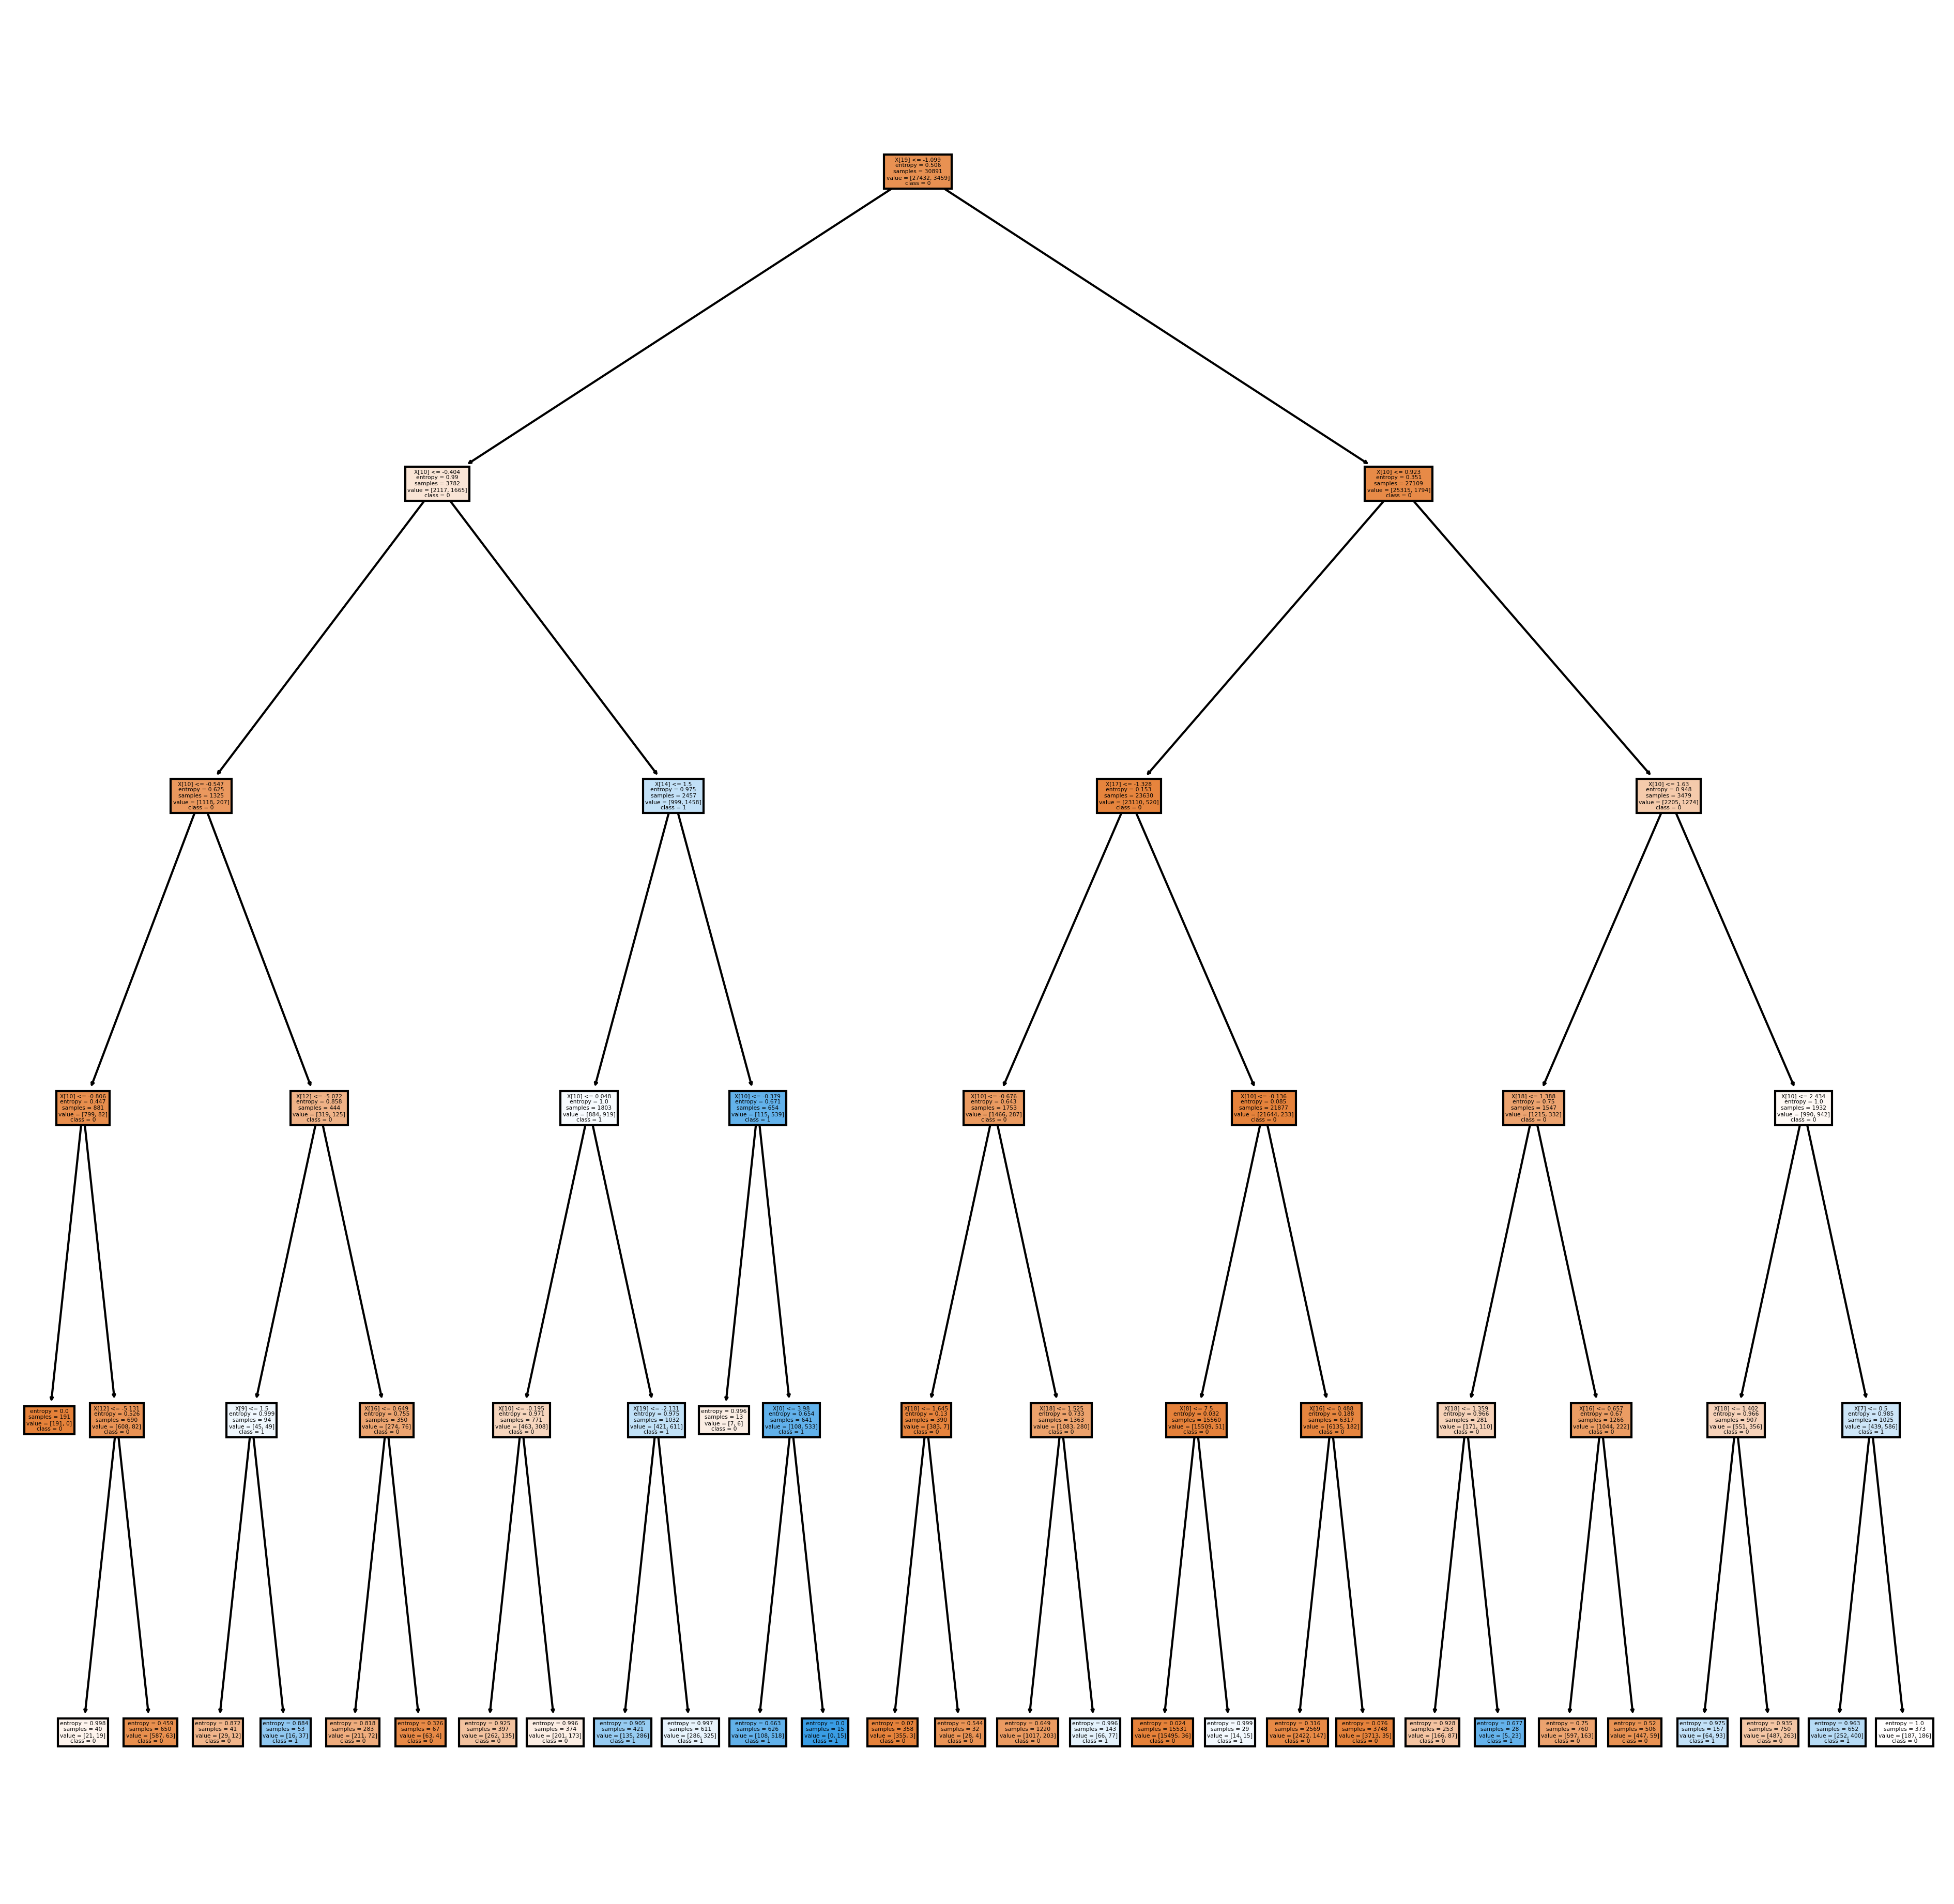

In [63]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=300)
#The above line is used to set the pixels of the Decision Trees nodes so that
#the content mentioned in each node of Decision tree is visible.
cn=['0','1']
tree.plot_tree(classifier,class_names=cn,filled = True)

## 4. Random Forest Classifier

In [64]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',max_depth = 8, min_samples_leaf=7)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=7,
                       n_estimators=10)

In [65]:
#To see no. of decision trees created
len(classifier.estimators_)

#To see the decision trees created
classifier.estimators_

#To access a particular decision tree, we can use indexing
classifier.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=7, random_state=1777821082)

In [66]:
# Predicting the Test set results
y_prediction = classifier.predict(X_test)

In [67]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[8815,  301],
       [ 557,  624]], dtype=int64)

In [68]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Random Forest Classifier: ',accuracy_score(y_test,y_prediction)*100)

Accuracy in case of  Random Forest Classifier:  90.99737787705156
